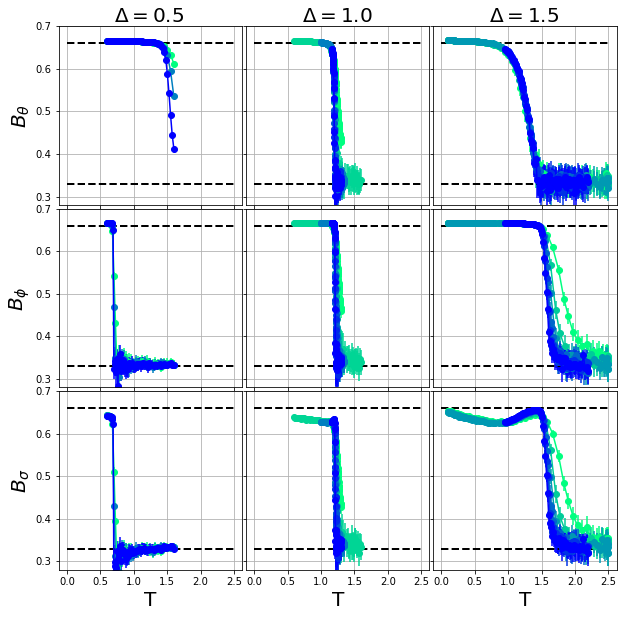

In [13]:
#matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import math
import sys
import os
from random import shuffle
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import fmin
from scipy.optimize import fsolve
from scipy import interpolate
from scipy.optimize import curve_fit
import scipy.optimize as opt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.signal import savgol_filter
from random import gauss
import matplotlib.ticker as ticker


%matplotlib inline

#simple plots
######
#- plot
######

fig, axs = plt.subplots(nrows=3,ncols = 3, sharex=True, sharey = True, figsize = (10,10)) # frameon=False removes frames

plt.subplots_adjust(hspace=.02, wspace=.02)

for i in range(3):
    for j in range(3):
        axs[i,j].grid()
        axs[i,j].plot([0.0, 2.5], [0.33, 0.33], color = 'black', linewidth = 2, linestyle = '--')
        axs[i,j].plot([0.0, 2.5], [0.66, 0.66], color = 'black', linewidth = 2, linestyle = '--')
        axs[i,j].set_ylim([0.28, 0.70])

deltas = [0.5, 1.0, 1.5]
lambda3 = 2.1
Kc = 0.0
N_list = [[20, 40, 80], [20, 40, 60, 80, 100, 140, 180], [20, 40, 60, 80, 100, 120]]



#inds = [12, 17, 22] becomes
#ind = 22 is sigma
#ind = 12 is theta
#ind = 17 is phi
inds = [2,5,8] #of obs

#if you want mag 
#inds = [0,3,6] #of obs
#if you want susc
#inds = [1,4,7] #of obs


cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='winter_r')

all_data = np.load('data_mag_compare.npy',allow_pickle=True)


for i in range(len(deltas)):
    #get data
    j2 = deltas[i]
    j6 = 2.0-j2

    #data_thermo = []
    #error_thermo = []
    #range_x = []
    N_d = N_list[i]

    colors_size = [scalarMap.to_rgba(j/(len(N_d)-1)) for j in range(len(N_d))]   

    for n in range(len(N_list[i])):

        for l in range(3):

            ind = inds[l]

            temp = all_data[i][n][0]
            data = all_data[i][n][2*ind + 1]
            error = all_data[i][n][2*ind + 2]

            axs[l,i].errorbar(temp, data, yerr = error, fmt ='-o', color=colors_size[n])

    

#do the legend and append at the end

axs[0,0].set_xlabel(r'$\Delta = 0.5$ ', fontsize=20);
axs[0,0].xaxis.set_label_position('top')
axs[0,1].set_xlabel(r'$\Delta = 1.0$ ', fontsize=20);
axs[0,1].xaxis.set_label_position('top')
axs[0,2].set_xlabel(r'$\Delta = 1.5$ ', fontsize=20);
axs[0,2].xaxis.set_label_position('top')

axs[0,0].set_ylabel(r'$B_{\theta}$ ', fontsize=20);
axs[1,0].set_ylabel(r'$B_{\phi}$ ', fontsize=20);
axs[2,0].set_ylabel(r'$B_{\sigma}$ ', fontsize=20);


axs[2,0].set_xlabel('T', fontsize = 20)
axs[2,1].set_xlabel('T', fontsize = 20)
axs[2,2].set_xlabel('T', fontsize = 20)





plt.savefig('./Compare_binders.png', format='png', dpi = 100, bbox_inches='tight')
plt.show() 